# Quick Start

---

Getting started with image processing is straightforward. There's three classes of operations in `phenotypic`: `ImageOperation`, `MeasureFeature`, and `ImagePipeline`.

`ImageOperation`s are processes that operate on the data of an image in preparation for feature extraction by `MeasureFeature`. `ImagePipeline`s are a collection of operations and measurements compiled into a single class for convenience. To get started with `phenotypic`, it's fastest to start by using one of the pipeines in `phenotypic.prefab`. Below we use `phenotypic.prefab.HeavyWatershedPipeline`, which was used with hand scanner images of *Kluveromyces Marxianus*.

In [1]:
import phenotypic as pht

filepaths = [x for x in
             pht.data.yield_sample_dataset(mode='filepath')]  # This returns the filepaths for this sample data
filepaths

[PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_5.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_6.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_7.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_8.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_5.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_6.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_7.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_8.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/4_1S_5.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/4_1S

## Processing your first image

---
Here we're gonna import our first image, and the image contains a 96 array format. Accepted file formats are jpegs, tiffs, pngs, and RAW files.

(<Figure size 800x600 with 1 Axes>, <Axes: >)

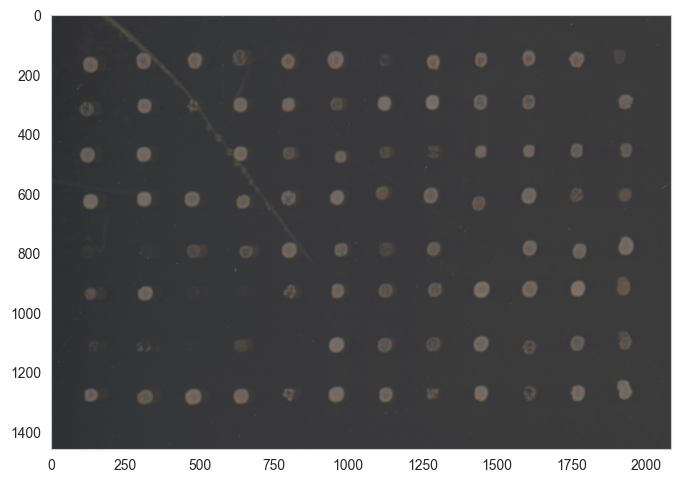

In [2]:

# We're gonna import the first image, lets make an image with a grid in 96 array format
# Accepted filepaths are jpegs, tiffs, pngs, and RAW format files
image = pht.GridImage.imread(filepaths[0], nrows=8, ncols=12)
image.show()

You can always visualize your image with `Image.show()`. This returns a matplotlib figure and axes object, but should plot the figures inside a jupyter notebook. The axis labels are the pixel rows and columns that show the size of your photo. If your original input is rgb or grayscale, `Image.show()` will return the original image. To show the grayscale converted version of your image, use `Image.gray.show()`.

(<Figure size 900x1000 with 1 Axes>, <Axes: >)

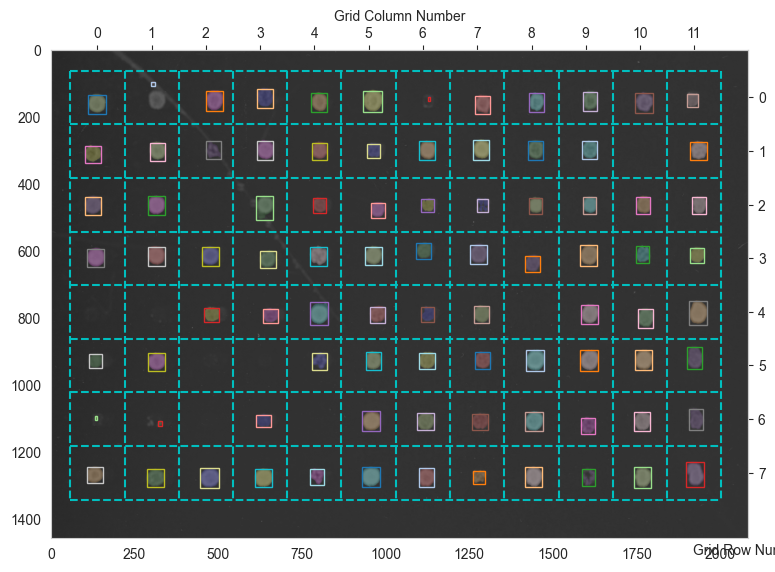

In [4]:
from phenotypic.prefab import HeavyWatershedPipeline

pipe = HeavyWatershedPipeline()

pipe.apply(image, inplace=True)  # we apply the image here
image.show_overlay()


In image pr

# Processing lots of images

In [3]:


import pandas as pd
from tqdm import tqdm

from phenotypic.prefab import HeavyWatershedPipeline

pipe.set_meas([pht.measure.MeasureSize()])

meas = []

# We use tqdm as a counter
for image_path in tqdm(filepaths, desc="Images", total=20):

meas = pd.concat(meas, axis=0)
meas

Images: 100%|██████████| 20/20 [13:46<00:00, 41.32s/it]


,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum,Size_Area,Size_IntegratedIntensity
0,8,GridImage,b'',2_1S_5,1,3.071429,182.626984,0,174,10,193,0,0,0,126.0,34.616614
1,8,GridImage,b'',2_1S_5,2,105.313725,299.941176,101,295,111,306,0,1,1,51.0,14.581481
2,8,GridImage,b'',2_1S_5,3,146.067464,634.450718,119,611,174,659,0,3,3,2090.0,613.200891
3,8,GridImage,b'',2_1S_5,4,148.396543,1606.542222,121,1585,178,1629,0,9,9,2025.0,737.774867
4,8,GridImage,b'',2_1S_5,5,153.518557,957.686625,123,930,186,986,0,5,5,2856.0,1087.264751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8,GridImage,b'',6_1S_8,72,1336.455882,2091.926471,1330,2088,1342,2097,6,11,83,68.0,17.288700
72,8,GridImage,b'',6_1S_8,73,1366.098676,1601.587957,1332,1572,1401,1630,6,8,80,3172.0,1317.994496
73,8,GridImage,b'',6_1S_8,74,1371.225493,1761.640060,1334,1730,1409,1794,6,9,81,4009.0,1690.029738
74,8,GridImage,b'',6_1S_8,75,1381.989939,1918.927456,1343,1887,1421,1950,6,10,82,3777.0,1482.023889


## Adding in metadata for downstream processing

In [6]:

# Lets add the condition of these measurements
# meas.insert(0, "Metadata_Condition", "30C")

# The original naming rule for this data was "{Time}_{PlateSet}{Media}_{Replicate}"
# Based on this naming rule, let's add the remaining metadata
time, setmedia, replicate = meas["Metadata_ImageName"].str.split("_")

# This naming rule leads to some awkward splitting. It's usually better to separate independent variables with underscores and related variables with dashes
plateset, media = setmedia.str.split("")[[1, 2]]

meas[["Metadata_Time", "Metadata_PlateSet", "Metadata_Media", "Metadata_Replicate"]] = time, plateset, media, replicate
meas

ValueError: too many values to unpack (expected 3)